<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-3--yolo-cv-signal-RED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jg5EidJcMggFcVCjF9BEGFfgqs8692nb' -O traffic-signal-0.jpg

In [3]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [8]:
img = cv2.imread('traffic-signal-0.jpg') #[..., ::-1]

In [ ]:
cv2_imshow(img)

In [9]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
# img = 'traffic-signal-0.jpg'

# Inference
results = model(img, size = 720)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-9-11 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [10]:
results.save()

Saved 1 image to runs/detect/exp


In [11]:
signals = results.pandas().xyxy[0]

In [12]:
signals

,xmin,ymin,xmax,ymax,confidence,class,name
0,374.408783,265.207977,484.758789,500.640320,0.866934,9,traffic light
1,186.661682,334.276581,289.500519,555.672363,0.851642,9,traffic light


In [13]:
x1, y1, x2, y2 = int(signals.iloc[1,0]), int(signals.iloc[1,1]), int(signals.iloc[1,2]), int(signals.iloc[1,3])

In [14]:
print(x1, y1, x2, y2)

186 334 289 555


In [16]:
signal1 = img[y1:y2, x1:x2]

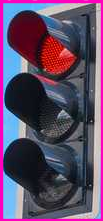

In [18]:
cv2_imshow(signal1)

In [ ]:
#cv2.imwrite('./signal1.jpg', signal1)

In [19]:
import numpy as np

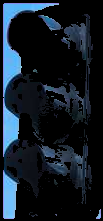

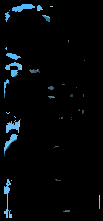

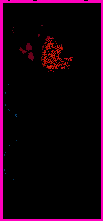

In [20]:
hsv_frame = cv2.cvtColor(signal1, cv2.COLOR_BGR2HSV)

# Red color
low_red = np.array([1, 220, 90]) # 161,155,84
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red, high_red)
red = cv2.bitwise_and(signal1, signal1, mask=red_mask)

# Blue color
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
blue = cv2.bitwise_and(signal1, signal1, mask=blue_mask)

# Green color
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)
green = cv2.bitwise_and(signal1, signal1, mask=green_mask)

# Every color except white
low = np.array([0, 42, 0])
high = np.array([179, 255, 255])
mask = cv2.inRange(hsv_frame, low, high)
result = cv2.bitwise_and(signal1, signal1, mask=mask)

#cv2_imshow(signal1)
cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(red)
#cv2_imshow(result)

H :0  199
S :100  255
V :142  221


H :0  72
S :128  255
V :67  255

In [21]:
l_h, u_h = 0,72
l_s, u_s = 128, 255
l_v, u_v = 67, 255

l_red = np.array([l_h, l_s, l_v])
u_red = np.array([u_h, u_s, u_v])

In [22]:
red_mask = cv2.inRange(hsv_frame, l_red, u_red)
red = cv2.bitwise_and(signal1, signal1, mask=red_mask)

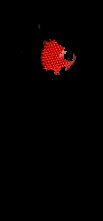

In [23]:
cv2_imshow(red)

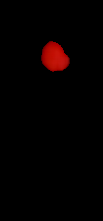

In [24]:
blur = cv2.medianBlur(red,15)
cv2_imshow(blur)

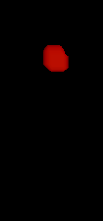

In [25]:
kernel = np.ones((12,12),np.uint8)
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)
cv2_imshow(shaved)